Welcome to Tic Tac Toe!
1. Play
2. Check High Scores


Choose an option (1/2):  1
Choose mode: PVP (1) or PVC (2):  1


  |   |  
-----
  |   |  
-----
  |   |  
-----
Player X's turn.


Enter position (1-9):  8


  | X |  
-----
  |   |  
-----
  |   |  
-----
Player O's turn.


Enter position (1-9):  1


  | X |  
-----
  |   |  
-----
O |   |  
-----
Player X's turn.


Enter position (1-9):  6


  | X |  
-----
  |   | X
-----
O |   |  
-----
Player O's turn.


Enter position (1-9):  4


  | X |  
-----
O |   | X
-----
O |   |  
-----
Player X's turn.


Enter position (1-9):  7


X | X |  
-----
O |   | X
-----
O |   |  
-----
Player O's turn.


Enter position (1-9):  9


X | X | O
-----
O |   | X
-----
O |   |  
-----
Player X's turn.


Enter position (1-9):  5


X | X | O
-----
O | X | X
-----
O |   |  
-----
Player O's turn.


Enter position (1-9):  2


X | X | O
-----
O | X | X
-----
O | O |  
-----
Player X's turn.


Enter position (1-9):  3


X | X | O
-----
O | X | X
-----
O | O | X
-----
Player X wins!


Do you want to play again? (y/n):  y


Welcome to Tic Tac Toe!
1. Play
2. Check High Scores


Choose an option (1/2):  2


High Scores:
PVP:
  XWins: 5
  O Wins: 3
  Draws: 1
PVC:
  Player Wins: 6
  Computer Wins: 1
  Draws: 3


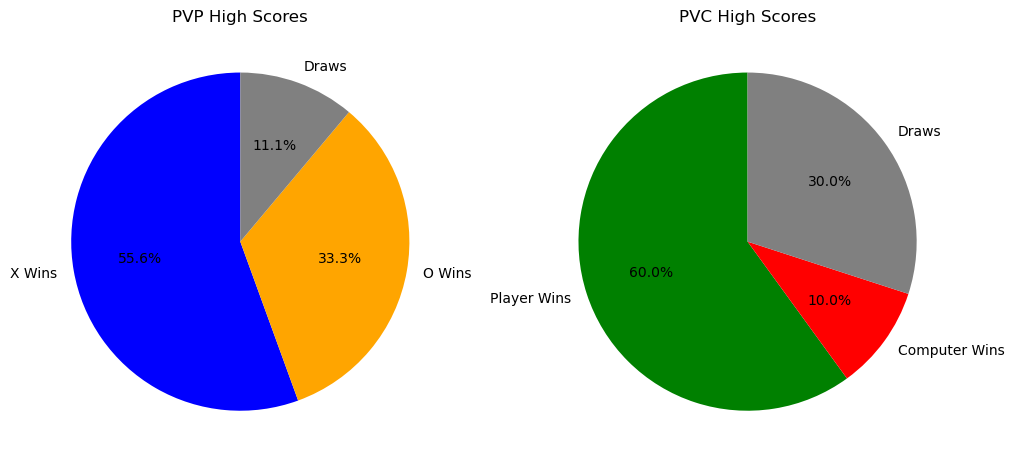

Do you want to play again? (y/n):  n


In [4]:
import random
import matplotlib.pyplot as plt
import json
import os

def load_high_scores(file_name="high_scores.json"):
    if os.path.exists(file_name):
        try:
            with open(file_name, "r") as file:
                data = json.load(file)
                # Ensure both 'PVP' and 'PVC' sections exist with 'Draw'
                data.setdefault("PVP", {"X": 0, "O": 0, "Draw": 0})
                data.setdefault("PVC", {"Player": 0, "Computer": 0, "Draw": 0})
                return data
        except (json.JSONDecodeError, ValueError):
            print("High scores file is corrupted or invalid. Resetting scores.")
    # Return default structure if no file or file is corrupted
    return {"PVP": {"X": 0, "O": 0, "Draw": 0}, "PVC": {"Player": 0, "Computer": 0, "Draw": 0}}

# Function to save high scores to a file
def save_high_scores(high_scores, file_name="high_scores.json"):
    with open(file_name, "w") as file:
        json.dump(high_scores, file)

# Load high scores
high_scores = load_high_scores()

def print_board(board):
    for row in board:
        print(" | ".join(row))
        print("-" * 5)

def check_winner(board):
    # Check rows and columns
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] != ' ':
            return board[i][0]
        if board[0][i] == board[1][i] == board[2][i] != ' ':
            return board[0][i]

    # Check diagonals
    if board[0][0] == board[1][1] == board[2][2] != ' ':
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] != ' ':
        return board[0][2]

    return None

def is_full(board):
    return all(cell != ' ' for row in board for cell in row)

def position_to_indices(position):
    position_map = {
        7: (0, 0), 8: (0, 1), 9: (0, 2),
        4: (1, 0), 5: (1, 1), 6: (1, 2),
        1: (2, 0), 2: (2, 1), 3: (2, 2)
    }
    return position_map.get(position, None)

def computer_move_moderate(board):
    available_positions = [pos for pos in range(1, 10) if board[position_to_indices(pos)[0]][position_to_indices(pos)[1]] == ' ']
    return random.choice(available_positions)

def computer_move_hard(board, computer, player):
    # Check if computer can win
    for pos in range(1, 10):
        indices = position_to_indices(pos)
        if board[indices[0]][indices[1]] == ' ':
            board[indices[0]][indices[1]] = computer
            if check_winner(board) == computer:
                board[indices[0]][indices[1]] = ' '
                return pos
            board[indices[0]][indices[1]] = ' '

    # Check if player can win and block
    for pos in range(1, 10):
        indices = position_to_indices(pos)
        if board[indices[0]][indices[1]] == ' ':
            board[indices[0]][indices[1]] = player
            if check_winner(board) == player:
                board[indices[0]][indices[1]] = ' '
                return pos
            board[indices[0]][indices[1]] = ' '

    # Choose random position
    return computer_move_moderate(board)

def display_high_scores():
    print("High Scores:")
    print("PVP:")
    print(f"  XWins: {high_scores['PVP']['X']}")
    print(f"  O Wins: {high_scores['PVP']['O']}")
    print(f"  Draws: {high_scores['PVP']['Draw']}")
    print("PVC:")
    print(f"  Player Wins: {high_scores['PVC']['Player']}")
    print(f"  Computer Wins: {high_scores['PVC']['Computer']}")
    print(f"  Draws: {high_scores['PVC']['Draw']}")

    # PVP Pie Chart
    pvp_labels = ["X Wins", "O Wins", "Draws"]
    pvp_values = [high_scores['PVP']['X'], high_scores['PVP']['O'], high_scores['PVP']['Draw']]
    pvp_colors = ['blue', 'orange', 'gray']

    # PVC Pie Chart
    pvc_labels = ["Player Wins", "Computer Wins", "Draws"]
    pvc_values = [high_scores['PVC']['Player'], high_scores['PVC']['Computer'], high_scores['PVC']['Draw']]
    pvc_colors = ['green', 'red', 'gray']

    plt.figure(figsize=(12, 6))

    # Plot PVP Pie Chart
    plt.subplot(1, 2, 1)
    if sum(pvp_values) == 0:
        plt.text(0.5, 0.5, "No Data", ha='center', va='center', fontsize=12)
        plt.axis("off")
    else:
        plt.pie(pvp_values, labels=pvp_labels, autopct="%1.1f%%", startangle=90, colors=pvp_colors)
    plt.title("PVP High Scores")

    # Plot PVC Pie Chart
    plt.subplot(1, 2, 2)
    if sum(pvc_values) == 0:
        plt.text(0.5, 0.5, "No Data", ha='center', va='center', fontsize=12)
        plt.axis("off")
    else:
        plt.pie(pvc_values, labels=pvc_labels, autopct="%1.1f%%", startangle=90, colors=pvc_colors)
    plt.title("PVC High Scores")

   

    plt.show()

def tic_tac_toe():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    print("Welcome to Tic Tac Toe!")
    print("1. Play")
    print("2. Check High Scores")
    choice = input("Choose an option (1/2): ")

    if choice == '2':
        display_high_scores()
        return

    mode = input("Choose mode: PVP (1) or PVC (2): ")

    if mode == '2':
        difficulty = input("Choose difficulty: Moderate (1) or Hard (2): ")
        player = 'X'
        computer = 'O'

    print_board(board)
    current_player = 0  # 0 for Player 1, 1 for Player 2/Computer

    while True:
        if mode == '1' or (mode == '2' and current_player == 0):
            print(f"Player {['X', 'O'][current_player]}'s turn.")
            try:
                position = int(input("Enter position (1-9): "))
            except ValueError:
                print("Invalid input. Please enter a number between 1 and 9.")
                continue

            if position not in range(1, 10):
                print("Invalid position. Please enter a number between 1 and 9.")
                continue

            indices = position_to_indices(position)
            if not indices or board[indices[0]][indices[1]] != ' ':
                print("Position already taken or invalid. Choose a different one.")
                continue
        else:
            if difficulty == '1':
                position = computer_move_moderate(board)
            else:
                position = computer_move_hard(board, computer, player)
            print(f"Computer chooses position {position}.")

            indices = position_to_indices(position)

        board[indices[0]][indices[1]] = ['X', 'O'][current_player]
        print_board(board)

        winner = check_winner(board)
        if winner:
            if mode == '1':  # PVP mode
                print(f"Player {winner} wins!")
                high_scores['PVP'][winner] += 1
            else:  # PVC mode
                if current_player == 0:  # Player
                    print("Player wins!")
                    high_scores['PVC']['Player'] += 1
                else:  # Computer
                    print("Computer wins!")
                    high_scores['PVC']['Computer'] += 1
            break

        if is_full(board):
            print("It's a draw!")
            if mode == '1':
                high_scores['PVP']['Draw'] += 1
            else:
                high_scores['PVC']['Draw'] += 1
            break

        current_player = 1 - current_player

    save_high_scores(high_scores)

if __name__ == "__main__":
    while True:
        tic_tac_toe()
        if input("Do you want to play again? (y/n): ").lower() != 'y':
            break
